<h1 style="text-align:center;"> Breast Cancer Diagnosis with Machine Learning </h1>
<hr>

<h2>Introduction</h2>
<p><strong>Breast Cancer</strong> is the most common type of cancers world wide. According to the statistics published in 2014 by the Turkish Ministry of Health, from all the cancer types diagnosed 43% of them are breast cancer [ref. <a href="https://hsgm.saglik.gov.tr/depo/birimler/kanser-db/istatistik/2014-RAPOR._uzuuun.pdf" target="_blank">Turkish Ministry of Health detailed report</a>]</p>
<p>In this project, we will to utilize the power of machine learning to solve one of the most crucial challenges in Breast Cancer Diagnosis.</p>

<h2>Dataset</h2>
<p>The dataset that is going to be used in this project is the <a href="https://www.kaggle.com/uciml/breast-cancer-wisconsin-data" target="_blank">Breast Cancer Wisconsin (Diagnostic) Data Set</a></p>
<p>The dataset consists of <code>569</code> samples with the <code>32</code> features being computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. </p>

<h2>Prerequisites</h2>

<p>In order to run the code yourself, make sure that you have the latest versions of the listed modules:
   <ul>
       <li><strong><a href="https://numpy.org/" target="_blank">Numpy:</a></strong> The library for efficient containment of multi-dimensional data </li>
       <li><strong><a href="https://pandas.pydata.org/" target="_blank">Pandas:</a></strong> This library contains out-of-the-box functions for data analysis and manipulation. </li>
       <li><strong><a href="https://pandas.pydata.org/" target="_blank">Pandas:</a></strong> This library contains out-of-the-box functions for data analysis and manipulation. </li>
   </ul>
</p>


<h2>Code</h2>

<p>First we are going to import <code>Pandas</code> and <code>Numpy</code> to make use of their data analysis functionalities</p>
<br>

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import pandas as pd
np.random.seed(31415)

In [4]:
data = pd.read_csv("data.csv",header=0)
data.drop("Unnamed: 32",axis=1,inplace=True)
data.drop("id",axis=1,inplace=True)
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [11]:
data.describe(include='all') # this will describe the all statistical functions of our data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [7]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
#change to binary category 
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212
% of cells labeled Benign 62.74 %
% of cells labeled Malignant 37.26 %


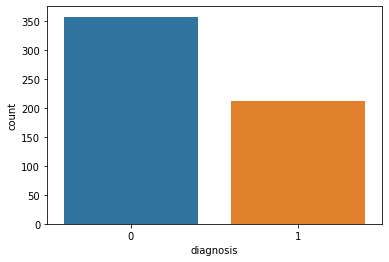

In [9]:
import matplotlib.pyplot as plt # this is used to plot the graph 
import seaborn as sns # used to plot interactive graph
%matplotlib inline
sns.countplot(data['diagnosis'],label="Count")
benign, malignant = data['diagnosis'].value_counts()
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant : ', malignant)
print('% of cells labeled Benign', round(benign / len(data) * 100, 2), '%')
print('% of cells labeled Malignant', round(malignant / len(data) * 100, 2), '%')

Calculate count of missing data

In [12]:
data.isnull().sum(axis=0)

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

 here 3- 32 are divided into three parts first is Mean (3-13),  Stranded Error(13-23) and  Worst(23-32) and each contain 10 parameter (radius, texture,area, perimeter, smoothness,compactness,concavity,concave points,symmetry and fractal dimension) 

Here Mean means the means of the all cells,  standard Error of all cell and worst means the worst  cell 

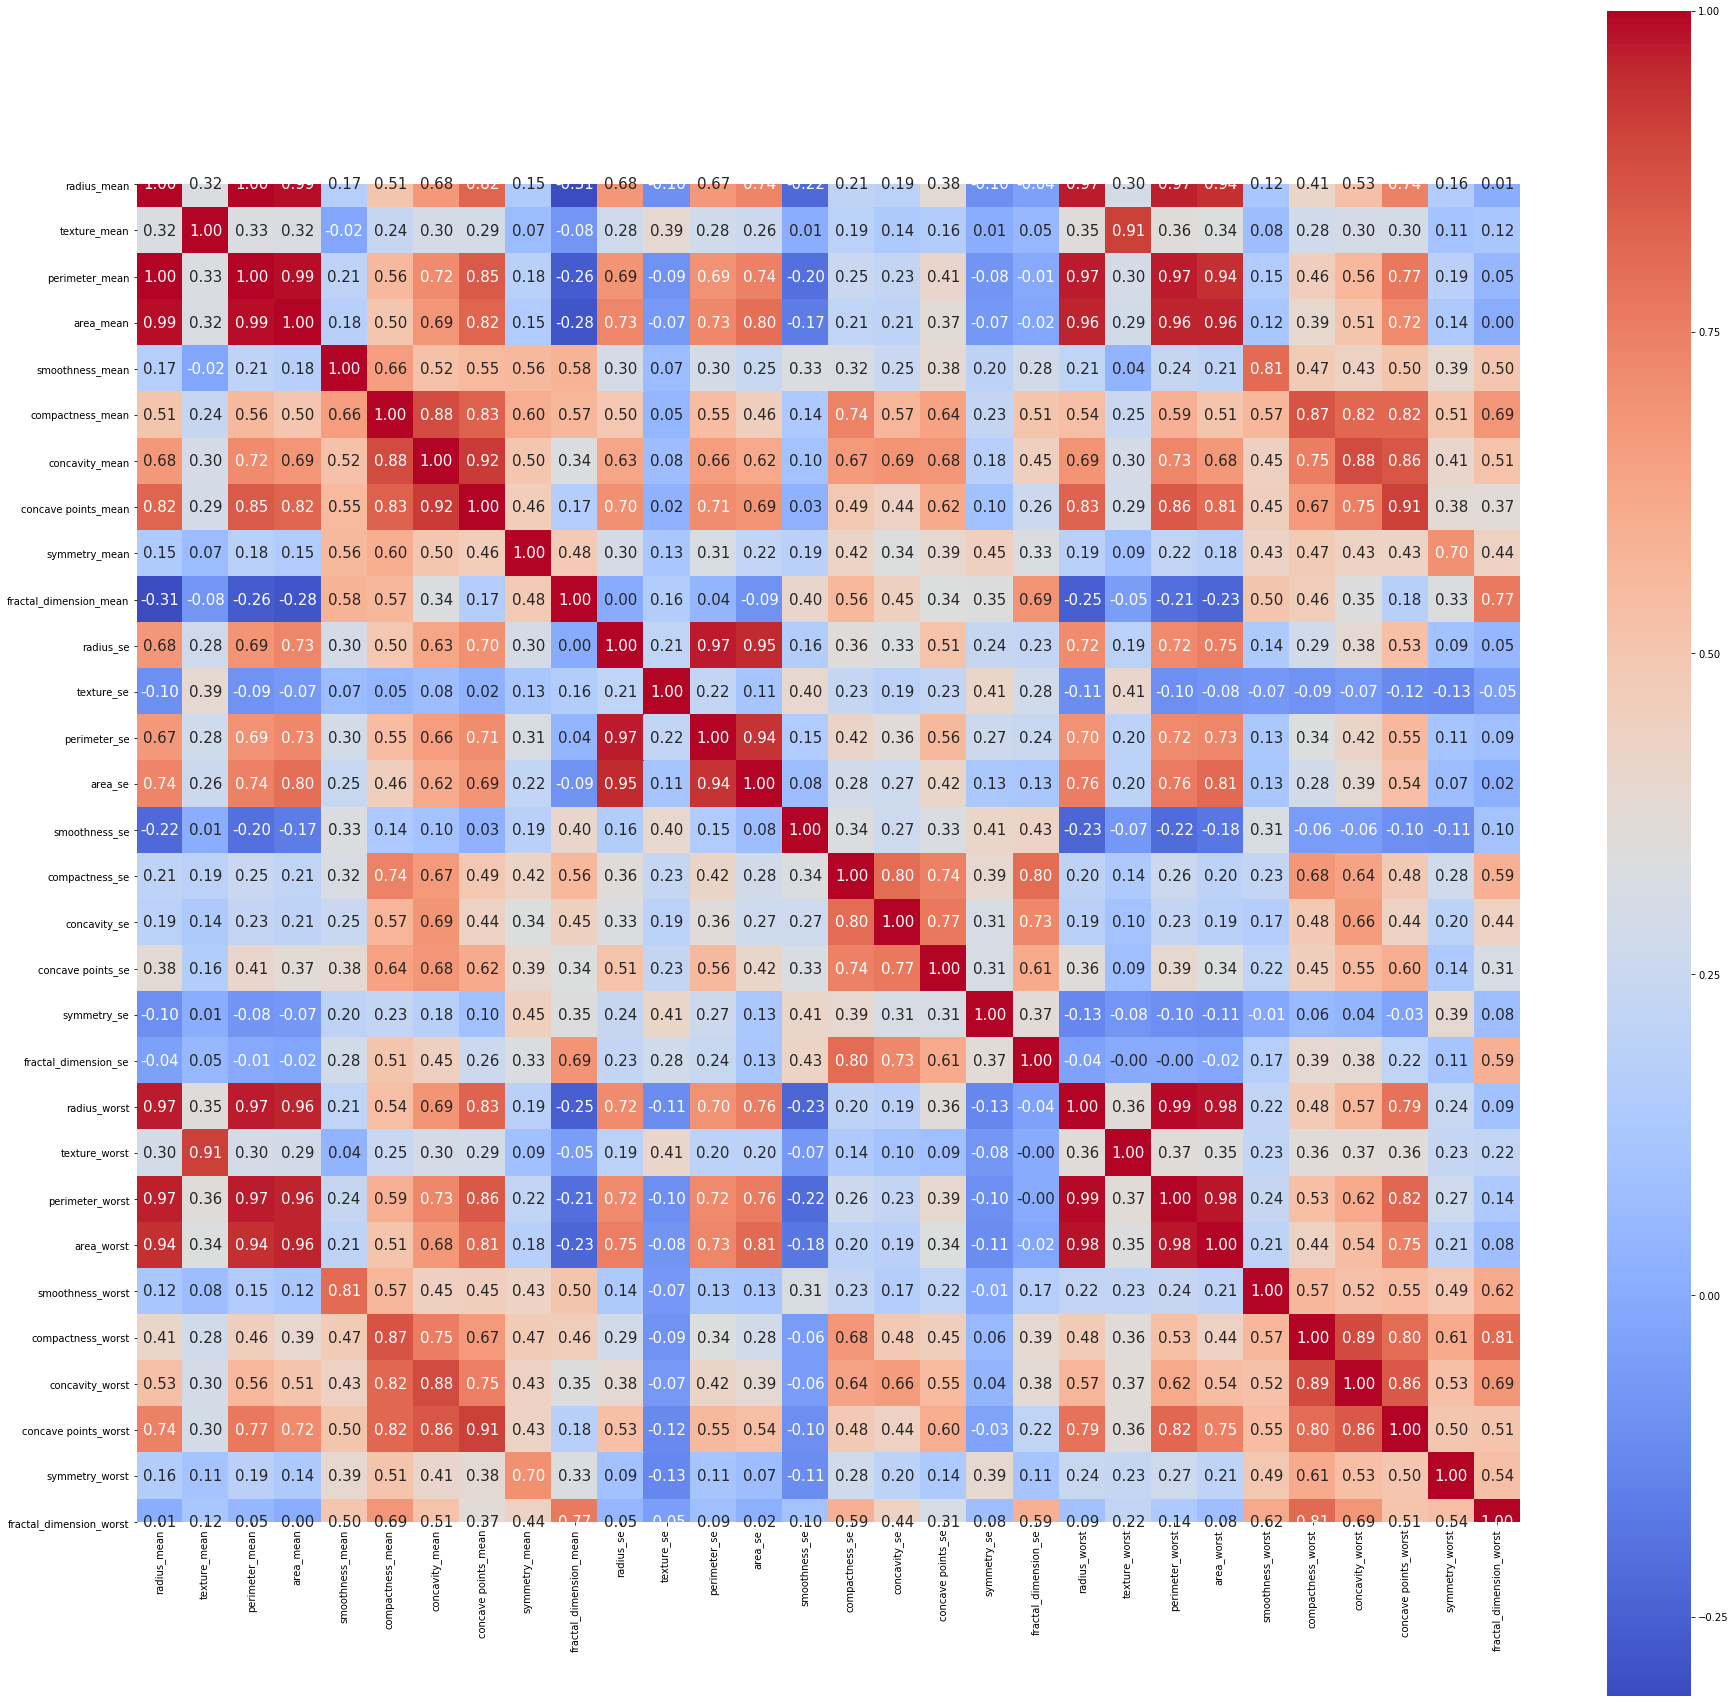

In [13]:
# now lets draw a correlation graph so that we can remove multi colinearity it means the columns are
# dependenig on each other so we should avoid it because what is the use of using same column twice
# lets check the correlation between features
# now we will do this analysis only for features_mean then we will do for others and will see who is doing best
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
corr = data.drop("diagnosis",axis=1).corr() # .corr is used for find corelation
plt.figure(figsize=(31,31))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data.drop("diagnosis",axis=1).columns, yticklabels= data.drop("diagnosis",axis=1).columns,
           cmap= 'coolwarm') 

<h1>Deep learning model using Pytorch</h1>

In [122]:
import torch
import plotly.express as px
import chart_studio.plotly as py 
import cufflinks as cf
cf.go_offline()
np.random.seed(0)

In [127]:
torch.cuda.is_available()

True

In [8]:
data_sh=data.sample(frac=1).drop(["id"],axis=1).reset_index(drop=True)

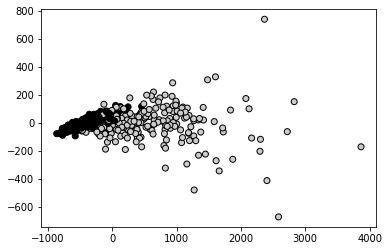

In [145]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2) #2-dimensional PCA
pca.fit(data_sh.iloc[:,1:].values)
X_pca = pca.transform(data_sh.iloc[:,1:].values)
plt.scatter(X_pca[:,0],X_pca[:,1],c=data_sh["diagnosis"].values,cmap=plt.cm.nipy_spectral,
           edgecolor='k')

In [133]:
fig = px.scatter(X_pca, x=0, y=1,color=data_sh.diagnosis.astype("str"),color_discrete_sequence=['red','blue'])
fig.show()

In [134]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_sh, test_size = 0.2)
print(train.shape)
print(test.shape)

(455, 31)
(114, 31)


In [135]:
train

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
324,0,15.710,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.05933,0.1816,...,17.50,19.25,114.30,922.8,0.1223,0.1949,0.17090,0.13740,0.2723,0.07071
175,0,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,...,7.93,19.54,50.41,185.2,0.1584,0.1202,0.00000,0.00000,0.2932,0.09382
220,1,12.830,22.33,85.26,503.2,0.10880,0.17990,0.16950,0.06861,0.2123,...,15.20,30.15,105.30,706.0,0.1777,0.5343,0.62820,0.19770,0.3407,0.12430
23,0,11.840,18.94,75.51,428.0,0.08871,0.06900,0.02669,0.01393,0.1533,...,13.30,24.99,85.22,546.3,0.1280,0.1880,0.14710,0.06913,0.2535,0.07993
415,1,20.340,21.51,135.90,1264.0,0.11700,0.18750,0.25650,0.15040,0.2569,...,25.30,31.86,171.10,1938.0,0.1592,0.4492,0.53440,0.26850,0.5558,0.10240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,1,21.610,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.15620,0.2162,...,26.23,28.74,172.00,2081.0,0.1502,0.5717,0.70530,0.24220,0.3828,0.10070
36,0,13.270,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.02456,0.1496,...,15.14,23.60,98.84,708.8,0.1276,0.1311,0.17860,0.09678,0.2506,0.07623
358,0,14.800,17.66,95.88,674.8,0.09179,0.08890,0.04069,0.02260,0.1893,...,16.43,22.74,105.90,829.5,0.1226,0.1881,0.20600,0.08308,0.3600,0.07285
99,0,11.430,17.31,73.66,398.0,0.10920,0.09486,0.02031,0.01861,0.1645,...,12.78,26.76,82.66,503.0,0.1413,0.1792,0.07708,0.06402,0.2584,0.08096


In [136]:
X=torch.tensor(train.iloc[:,1:].values).type(torch.FloatTensor)
y=torch.tensor(train["diagnosis"].tolist()).type(torch.LongTensor)

In [137]:
import torch.nn as nn
import torch.nn.functional as F

#our class must extend nn.Module
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        #Our network consists of 3 layers. 1 input, 1 hidden and 1 output layer
        #This applies Linear transformation to input data. 
        self.fc1 = nn.Linear(30,300)
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.zeros_(self.fc1.bias)
        
        self.fc2 = nn.Linear(300,500)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.zeros_(self.fc2.bias)
        
        self.fc3=nn.Linear(500,200)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.zeros_(self.fc3.bias)
        
        #This applies linear transformation to produce output data
        self.fc4 = nn.Linear(200,2)
        nn.init.xavier_uniform_(self.fc4.weight)
        nn.init.zeros_(self.fc4.bias)
        
    #This must be implemented
    def forward(self,x):
        #Output of the first layer
        x = self.fc1(x) # 569x30 . 30x100 -> 569x100
        #Activation function is Relu. Feel free to experiment with this
        x = F.relu(x)
        
        x=self.fc2(x) # 569x100.100x200 ->569x200
        x=F.relu(x)
        
        x=self.fc3(x)
        x=F.relu(x)
        x=F.dropout(x,p=0.5)
        #This produces output
        x = self.fc4(x)# 569x200.200x2 -> 569x2
        return x
        
    #This function takes an input and predicts the class, (0 or 1)        
    def predict(self,x):
        #Apply softmax to output
        pred = F.softmax(self.forward(x))
        ans = []
        for t in pred:
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)
        

#Initialize the model        
model = Net()
#Define loss criterion
criterion = nn.CrossEntropyLoss()
#Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=10e-4)


epoch 1	 loss 27.7678
epoch 11	 loss 12.4388
epoch 21	 loss 1.7856
epoch 31	 loss 0.7944
epoch 41	 loss 0.3676
epoch 51	 loss 0.2595
epoch 61	 loss 0.2773
epoch 71	 loss 0.2395
epoch 81	 loss 0.2299
epoch 91	 loss 0.2116
epoch 101	 loss 0.2115
epoch 111	 loss 0.2128
epoch 121	 loss 0.2156
epoch 131	 loss 0.1991
epoch 141	 loss 0.1908
epoch 151	 loss 0.1995
epoch 161	 loss 0.1928
epoch 171	 loss 0.1944
epoch 181	 loss 0.1719
epoch 191	 loss 0.1824
epoch 201	 loss 0.1861
epoch 211	 loss 0.1846
epoch 221	 loss 0.1845
epoch 231	 loss 0.1786
epoch 241	 loss 0.1818
epoch 251	 loss 0.1847
epoch 261	 loss 0.1836
epoch 271	 loss 0.1804
epoch 281	 loss 0.1783
epoch 291	 loss 0.1820
epoch 301	 loss 0.1848
epoch 311	 loss 0.1740
epoch 321	 loss 0.1818
epoch 331	 loss 0.1806
epoch 341	 loss 0.1857
epoch 351	 loss 0.1735
epoch 361	 loss 0.1664
epoch 371	 loss 0.1690
epoch 381	 loss 0.1740
epoch 391	 loss 0.1732
epoch 401	 loss 0.1819
epoch 411	 loss 0.1604
epoch 421	 loss 0.1700
epoch 431	 loss 0.16

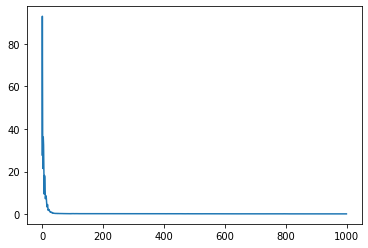

In [138]:
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    #Compute Cross entropy loss
    loss = criterion(y_pred,y)
    #Add loss to the list
    losses.append(loss.item())
    #Clear the previous gradients
    optimizer.zero_grad()
    #Compute gradients
    loss.backward()
    #Adjust weights
    optimizer.step()
    if i%10==0 or i==epochs-1:
        print("epoch {}\t loss {:.4f}".format(i+1,losses[i]))
plt.plot(losses)

In [141]:
#train accuarcy
pred=model.predict(X)

print("accuracy_score %{:.2f}".format((
(
    ((y.numpy()==pred.numpy()).sum())/len(y.numpy()))*100))
)

accuracy_score %94.29


/kuacc/users/aalabrash18/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



In [234]:
layout=[go.layout.Annotation(
                text='postive',
                align='left',
                bgcolor="#9B1B30"# "family" "size"
                ,showarrow=False,
                xref='paper',
                yref='paper',
                x=1.1,
                y=0.8,
                bordercolor='black',
                borderwidth=1
        ),go.layout.Annotation(
                text='false positive',
                align='left',
                bgcolor="#00ff00"# "family" "size"
                ,showarrow=False,
                xref='paper',
                yref='paper',
                x=1.1,
                y=0.7,
                bordercolor='black',
                borderwidth=1
        ),go.layout.Annotation(
                text='negative',
                align='left',
                bgcolor="#04179B"
                ,showarrow=False,
                xref='paper',
                yref='paper',
                x=1.1,
                y=0.6,
                bordercolor='black',
                borderwidth=1
        )
    ]

In [236]:
import plotly.graph_objects as go
X_pca_train=pca.transform(train.iloc[:,1:].values)
train_color=pd.Series(y.numpy())
train_color=train_color.map({1:'#9B1B30',0:'#04179B'})
train_color[np.ravel( np.argwhere((pred.numpy()!=y.numpy())==True))]='#00ff00'

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=X_pca_train[:,0],
    y=X_pca_train[:,1],
    mode="markers+text",
    marker_color=train_color,
    
))
fig.update_layout(
   showlegend=False,
    annotations=layout
)

fig.show()

In [154]:
#test accuarcy
X_test=torch.tensor(test.iloc[:,1:].values).type(torch.FloatTensor)
y_test=torch.tensor(test["diagnosis"].tolist()).type(torch.LongTensor)
pred_test=model.predict(X_test)

print("accuracy_score %{:.2f}".format((
(
    ((y_test.numpy()==pred_test.numpy()).sum())/len(y_test.numpy()))*100))
)

accuracy_score %97.37


/kuacc/users/aalabrash18/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



In [237]:
X_pca_test=pca.transform(test.iloc[:,1:].values)
test_color=pd.Series(y.numpy())
test_color=test_color.map({1:'#9B1B30',0:'#04179B'})
test_color[np.ravel( np.argwhere((pred_test.numpy()!=y_test.numpy())==True))]='#00ff00'

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=X_pca_test[:,0],
    y=X_pca_test[:,1],
    mode="markers+text",
    marker_color=test_color,
    
))
fig.update_layout(
   showlegend=False,
    annotations=layout
)

<h1>ML Part </h1>

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm 
from sklearn import metrics 

train, test = train_test_split(data, test_size = 0.2)# in this our main data is splitted into train and test
train_y=train["diagnosis"]
train_X=train.drop("diagnosis",axis=1)

test_y=test["diagnosis"]
test_X=test.drop("diagnosis",axis=1)
print(train_X.shape)
print(test_X.shape)

(455, 30)
(114, 30)


<h2>Experiment 1</h2>

<h3>RandomForestClassifier</h3>


In [14]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9298245614035088

<h3>Support Vector Machine </h3>


In [15]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9385964912280702

<h3>Logical Regreesion  </h3>


In [16]:
model=LogisticRegression(C=100)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9473684210526315

<h2>Experiment 2</h2>
<h3> extract the outliers </h3>

In [23]:
#outlier exraction, 
outlier=data[~(np.abs(data.radius_mean-data.radius_mean.mean())<(3*data.radius_mean.std()))]
outlier

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,1,25.22,24.91,171.5,1878.0,0.1063,0.2665,0.3339,0.1845,0.1829,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
180,1,27.22,21.87,182.1,2250.0,0.1094,0.1914,0.2871,0.1878,0.1800,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
212,1,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
352,1,25.73,17.46,174.2,2010.0,0.1149,0.2363,0.3368,0.1913,0.1956,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
461,1,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,0.2061,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


In [24]:
train_e2=train.drop(set.intersection(set(outlier.index),set(train.index)),axis=0).reset_index().copy()
train_e2_X=train_e2.drop("diagnosis",axis=1)
train_e2_y=train_e2.diagnosis

test_e2=test.drop(set.intersection(set(outlier.index),set(test.index)),axis=0).reset_index().copy()
test_e2_X=test_e2.drop("diagnosis",axis=1)
test_e2_y=test_e2.diagnosis


<h3>RandomForestClassifier</h3>


In [19]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_e2_X,train_e2_y)
prediction=model.predict(test_e2_X)
metrics.accuracy_score(prediction,test_e2_y)

0.9203539823008849

<h3>Support Vector Machine </h3>


In [20]:
model = svm.SVC()
model.fit(train_e2_X,train_e2_y)
prediction=model.predict(test_e2_X)
metrics.accuracy_score(prediction,test_e2_y)

0.9026548672566371

<h3>Logical Regreesion  </h3>


In [21]:
model=LogisticRegression(C=100)
model.fit(train_e2_X,train_e2_y)
prediction=model.predict(test_e2_X)
metrics.accuracy_score(prediction,test_e2_y)

0.9469026548672567

<h2>Experiment 3</h2>
<h3> selecting features </h3>

In [27]:
model=LogisticRegression(C=100)
model.fit(train_e2_X,train_e2_y)
prediction=model.predict(test_e2_X)
metrics.accuracy_score(prediction,test_e2_y)

0.9473684210526315

In [28]:
selected_feats = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
selected_feats2=['concave points_mean','perimeter_mean' , 'concavity_mean' , 'radius_mean','area_mean']
features_mean= list(train.columns[1:11])
features_se= list(data.columns[11:20])
features_worst=list(data.columns[21:31])

In [24]:
models=dict()
features_i2str=["all","selected_feats","selected_feats2","features_mean","features_se","features_worst"]
for i,features in enumerate([train_X.columns,selected_feats,selected_feats2,features_mean,features_se,features_worst]):
    #print(features)
    train_e3 = train_X[features]
    test_e3= test_X[features]
    for model in (RandomForestClassifier(n_estimators=100),svm.SVC(),LogisticRegression(C=100)):
        model_str=str(model.__class__).split(".")[-1].strip("'>")
        models[model_str]=models.get(model_str,[])## 
        model.fit(train_e3,train_y)
        prediction=model.predict(test_e3)
        models[model_str].append(metrics.accuracy_score(prediction,test_y))
pd.DataFrame(models,index=features_i2str)

,RandomForestClassifier,SVC,LogisticRegression
all,0.947368,0.938596,0.947368
selected_feats,0.912281,0.903509,0.894737
selected_feats2,0.921053,0.929825,0.885965
features_mean,0.938596,0.929825,0.885965
features_se,0.868421,0.877193,0.877193
features_worst,0.947368,0.956140,0.964912


In [30]:
from sklearn.model_selection import KFold
def classification_model(model,ip,train_set,test_set,trn_y=train_y,tst_y=test_y):
    returns={}
    rslts = []
    for train_ind, test_ind in KFold(5).split(train_set):
        model.fit(train_set[ip].iloc[train_ind], trn_y.iloc[train_ind])
        predictions = model.predict(test_set[ip])
        rslts.append(round(metrics.accuracy_score(predictions,tst_y),2))
    returns["CV_mean"]=round(np.mean(rslts),2)
    returns["CV_partions"]=rslts
    return returns

In [31]:
selected_feats = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
selected_feats2=['concave points_mean','perimeter_mean' , 'concavity_mean' , 'radius_mean','area_mean']
features_mean= list(data.columns[1:11])
features_se= list(data.columns[11:20])
features_worst=list(data.columns[21:31])
all_sets=train_X.columns.tolist()
# now these are the variables which we'll use for prediction

In [29]:
models=dict()
features_i2str=["all","selected_feats","selected_feats2","features_mean","features_se","features_worst"]
for i,features in enumerate([train_X.columns,selected_feats,selected_feats2,features_mean,features_se,features_worst]):
    #print(features)
    train_e3 = train_X[features]
    test_e3= test_X[features]
    for model in (RandomForestClassifier(n_estimators=100),svm.SVC(),LogisticRegression(C=100)):
        model_str=str(model.__class__).split(".")[-1].strip("'>")
        models[model_str]=models.get(model_str,[])## 
        model.fit(train_e3,train_y)
        prediction=model.predict(test_e3)
        models[model_str].append(metrics.accuracy_score(prediction,test_y))
pd.DataFrame(models,index=features_i2str)

,RandomForestClassifier,SVC,LogisticRegression
all,0.973684,0.894737,0.938596
selected_feats,0.921053,0.885965,0.929825
selected_feats2,0.938596,0.877193,0.938596
features_mean,0.956140,0.868421,0.947368
features_se,0.850877,0.859649,0.877193
features_worst,0.956140,0.894737,0.938596


In [32]:
models_cv=[]
features_i2str=["all","selected_feats","selected_feats2","features_mean","features_se","features_worst"]
for i,features in enumerate([all_sets,selected_feats,selected_feats2,features_mean,features_se,features_worst]):
    for model in (RandomForestClassifier(n_estimators=100),svm.SVC(),LogisticRegression(C=100,max_iter=50)):
        model_str=str(model.__class__).split(".")[-1].strip("'>")
        results=classification_model(model,features,train_X,test_X)
        results["feature"]=features_i2str[i]
        results["model"]=model_str
        models_cv.append(results)

In [28]:
df_cv=pd.DataFrame(models_cv)
df_cv.sort_values("CV_mean",ascending=False).set_index("model")

,CV_mean,CV_partions,feature
model,,,
LogisticRegression,0.95,"[0.95, 0.96, 0.94, 0.94, 0.98]",features_worst
SVC,0.95,"[0.96, 0.96, 0.96, 0.92, 0.93]",features_worst
RandomForestClassifier,0.95,"[0.95, 0.94, 0.95, 0.96, 0.94]",features_worst
SVC,0.94,"[0.96, 0.93, 0.96, 0.96, 0.91]",all
RandomForestClassifier,0.93,"[0.92, 0.9, 0.95, 0.93, 0.94]",all
SVC,0.92,"[0.93, 0.9, 0.93, 0.93, 0.89]",selected_feats2
RandomForestClassifier,0.92,"[0.93, 0.91, 0.93, 0.93, 0.91]",features_mean
RandomForestClassifier,0.91,"[0.91, 0.91, 0.93, 0.91, 0.91]",selected_feats2
SVC,0.91,"[0.9, 0.93, 0.9, 0.9, 0.93]",selected_feats


 <h2>Tuning Parameters  using grid search CV</h2>

In [45]:
from sklearn.model_selection import GridSearchCV
def Classification_model_gridsearchCV(model,param_grid,data_X,data_y):
    clf = GridSearchCV(model,param_grid,cv=5,scoring="accuracy",refit='AUC')
    clf.fit(data_X,data_y)
    print("Best parameters were found are :")
    print(clf.best_params_)
    print("bset estimator is ")
    print(clf.best_estimator_)
    print("best score is over dev set ")
    print(clf.best_score_)
    return clf.best_params_

<h3>Support Vector Machine with Grid Search CV</h3>


In [46]:
model=svm.SVC()
param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              },
 ]
best_params=Classification_model_gridsearchCV(model,param_grid,train_X,train_y)
best_params

Best parameters were found are :
{'C': 100, 'kernel': 'linear'}
bset estimator is 
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
best score is over dev set 
0.9692307692307693


{'C': 100, 'kernel': 'linear'}

In [47]:
model=svm.SVC(C=best_params['C'],kernel=best_params['kernel'])
model.fit(train_X,train_y)
print(metrics.accuracy_score(model.predict(test_X),test_y))


0.9473684210526315


<h3>Logistic Regression with Grid Search CV</h3>


In [48]:
model=LogisticRegression()
param_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000],'solver':['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}
best_params=Classification_model_gridsearchCV(model,param_grid,train_X,train_y)
best_params

Best parameters were found are :
{'C': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}
bset estimator is 
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
best score is over dev set 
0.9648351648351647


{'C': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}

In [49]:
model=LogisticRegression(C=best_params['C'],penalty=best_params['penalty'],solver=best_params['solver'])
model.fit(train_X,train_y)
print(metrics.accuracy_score(model.predict(test_X),test_y))


0.9298245614035088


<h3>RF with Grid Search CV</h3>


In [50]:
model=RandomForestClassifier()# a simple random forest model
param_grid = {'criterion': ['gini','entropy'], 'n_estimators': [10,20,50,100,1000]}
best_params=Classification_model_gridsearchCV(model,param_grid,train_X,train_y)
best_params

Best parameters were found are :
{'criterion': 'gini', 'n_estimators': 100}
bset estimator is 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
best score is over dev set 
0.9648351648351647


{'criterion': 'gini', 'n_estimators': 100}

In [51]:
model=RandomForestClassifier(criterion=best_params['criterion'],n_estimators=best_params['n_estimators'])
model.fit(train_X,train_y)
print(metrics.accuracy_score(model.predict(test_X),test_y))

0.9736842105263158


<h3> Logistic Regression Evaluation</h3> 

In [41]:
log_reg=LogisticRegression(C=10,penalty="l2",solver='newton-cg').fit(train_X,train_y)                                                                   

0.9473684210526315


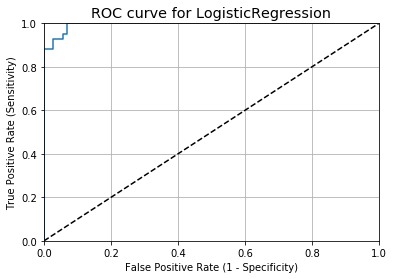

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
log_reg_predict = log_reg.predict(test_X)
log_reg_predict_proba = log_reg.predict_proba(test_X)[:, 1]
fpr, tpr, thresholds = roc_curve(test_y, log_reg_predict_proba)
print(metrics.accuracy_score(log_reg_predict,test_y))

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for LogisticRegression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [43]:
print('LogisticRegression Accuracy: {:.2f}%'.format(accuracy_score(test.diagnosis, log_reg_predict) * 100))
print('LogisticRegression AUC: {:.2f}%'.format(roc_auc_score(test.diagnosis, log_reg_predict_proba) * 100))
print('LogisticRegression Classification report:\n\n', classification_report(test.diagnosis, log_reg_predict))

LogisticRegression Accuracy: 94.74%
LogisticRegression AUC: 99.40%
LogisticRegression Classification report:

               precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

